In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
params = {
    "font.sans-serif":"Simhei",
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "figure.figsize": (10, 8),
    "figure.dpi":80,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.titlesize": 22,
    "axes.unicode_minus": False
}
plt.rcParams.update(params)

In [24]:
df=pd.read_excel("./表单2-处理2.xlsx")
df=df.fillna(0)
df=pd.get_dummies(df,columns=["类型"])
df=df.rename(columns={'类型_铅钡':'铅钡'})
df

,文物编号,文物采样点,风化与否,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),总含量,铅钡,类型_高钾
0,1,01,0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61,0,1
1,2,02,1,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89,1,0
2,3,03部位1,0,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00,0,1
3,3,03部位2,0,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88,0,1
4,4,04,0,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,54,54严重风化点,2,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00,96.92,1,0
63,55,55,0,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00,96.38,1,0
64,56,56,1,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00,92.24,1,0
65,57,57,1,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00,92.47,1,0


In [25]:
data=df.iloc[:,2:17]
target=df["铅钡"]
random=2
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.2,random_state=random)
clf = tree.DecisionTreeClassifier(
    criterion="gini",
    random_state=random,#随机数种子
    splitter="best",
    max_depth=3,  # 树的最大深度，防止过拟合
    #     min_samples_leaf=10,  #叶节点所需要的最小样本数
    #     min_samples_split=25,# 拆分内部节点所需要的最小样本数，防止过拟合
)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

1.0

In [26]:
df3=pd.read_excel("./表单3-处理.xlsx")
df3=df3.fillna(0)
X_pre=df3.iloc[:,2:]
clf.predict(X_pre)

array([0, 1, 1, 1, 1, 0, 0, 1], dtype=uint8)

In [27]:
clf.predict_proba(Xtest).T[1]

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

<Figure size 800x640 with 0 Axes>

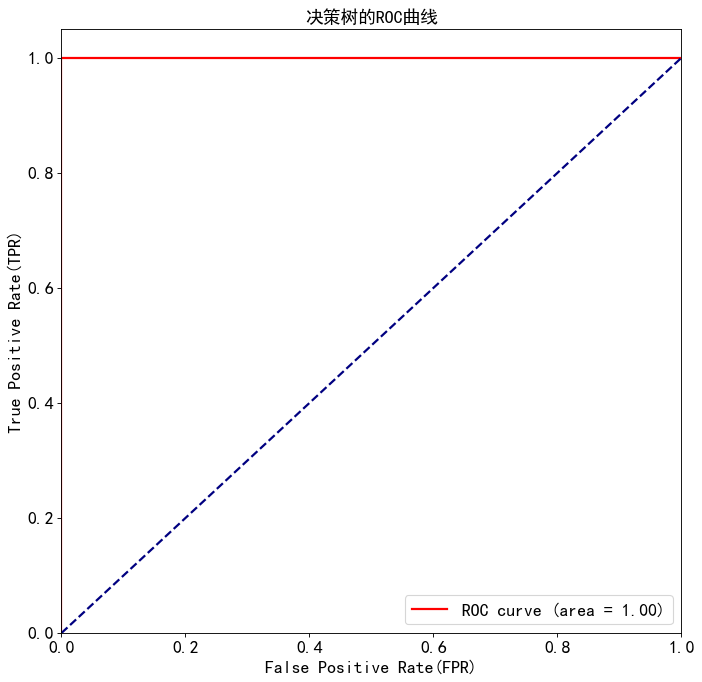

In [28]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
y_score = clf.predict_proba(Xtest)[:,1]
 
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(Ytest, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('决策树的ROC曲线')
plt.legend(loc="lower right")
plt.show()

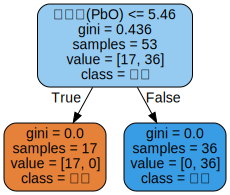

In [29]:
import graphviz

feature_name = data.columns

dot_data = tree.export_graphviz(
    clf,
    feature_names=feature_name,
    class_names=["高钾","铅钡"],
    filled=True,  # 是否填充颜色
    rounded=True,  # 每一块的边框为弧形
)
graph = graphviz.Source(dot_data)
graph

In [30]:
pd.DataFrame(clf.feature_importances_,index=data.columns)

,0
风化与否,0.0
二氧化硅(SiO2),0.0
氧化钠(Na2O),0.0
氧化钾(K2O),0.0
氧化钙(CaO),0.0
氧化镁(MgO),0.0
氧化铝(Al2O3),0.0
氧化铁(Fe2O3),0.0
氧化铜(CuO),0.0
氧化铅(PbO),1.0


In [31]:
clf.predict_proba(Xtest).T[1]

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [32]:
# 决策树的分类结果
class_ = ["高钾" if i==0 else "铅钡" for i in clf.predict(X_pre)]
pd.DataFrame(class_,index=df3["文物编号"],columns=["玻璃种类"])

,玻璃种类
文物编号,
A1,高钾
A2,铅钡
A3,铅钡
A4,铅钡
A5,铅钡
A6,高钾
A7,高钾
A8,铅钡


# 逻辑回归分类

In [33]:
from sklearn.linear_model import LogisticRegression as LR

In [34]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.3,random_state=2)
model = LR(max_iter=500)
model.fit(Xtrain, Ytrain)
pd.DataFrame(model.coef_[0],index=data.columns,columns=["逻辑回归系数"])

,逻辑回归系数
风化与否,-0.000209
二氧化硅(SiO2),-0.151782
氧化钠(Na2O),0.029621
氧化钾(K2O),-0.230645
氧化钙(CaO),-0.103631
氧化镁(MgO),-0.026976
氧化铝(Al2O3),-0.002290
氧化铁(Fe2O3),-0.023722
氧化铜(CuO),-0.067202
氧化铅(PbO),0.472286


In [35]:
model.score(Xtest,Ytest)

1.0

## 绘制分类结果的ROC曲线

In [36]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

<Figure size 800x640 with 0 Axes>

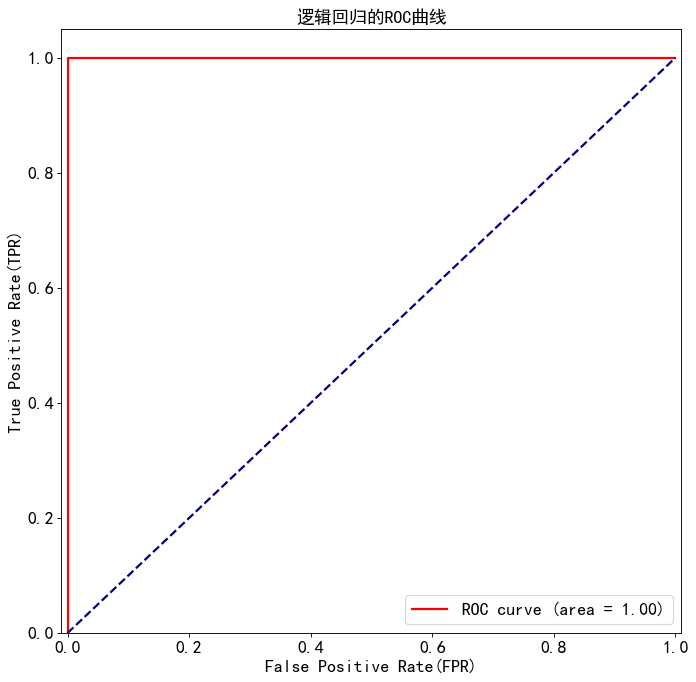

In [37]:
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
y_score = model.fit(Xtrain, Ytrain).decision_function(Xtest)
 
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(Ytest, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('逻辑回归的ROC曲线')
plt.legend(loc="lower right")
plt.show()

## 预测

In [38]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.3,random_state=5)
model = LR(max_iter=500)
model.fit(Xtrain, Ytrain)
class_ = ["高钾" if i==0 else "铅钡" for i in model.predict(X_pre)]
pd.DataFrame(class_,index=df3["文物编号"],columns=["玻璃种类"]).to_excel('3未知文物类型预测.xlsx')

# 敏感度分析

In [39]:
# 逻辑回归敏感性

w = model.coef_[0]
w0 = model.intercept_

PD = []
for i in range(Xtrain.shape[0]):
    ls = []
    x = Xtrain.iloc[i]
    e = np.exp(-w@x.values + w0)
    for j in range(len(w)):  
        ls.append(w[j] * e * ((1+e)**(-2)))
    PD.append(ls)

In [40]:
PD = pd.DataFrame(PD)

In [41]:
S = []
for i in range(Xtrain.shape[1]):
    s = 0
    for j in range(Xtrain.shape[0]):
        s += abs(PD.iloc[j,i])
    S.append(s / Xtrain.shape[0])

# 敏感度
mgd = pd.DataFrame(S, index=Xtrain.columns,columns=["敏感度"]).sort_values(by="敏感度", ascending=False)
mgd

,敏感度
氧化铅(PbO),0.005921
氧化钾(K2O),0.003050
二氧化硅(SiO2),0.001900
氧化钡(BaO),0.001272
氧化钙(CaO),0.001121
氧化铝(Al2O3),0.001033
氧化铜(CuO),0.000734
五氧化二磷(P2O5),0.000708
氧化铁(Fe2O3),0.000577
氧化钠(Na2O),0.000184


In [42]:
mgd.to_excel('3.1逻辑回归敏感度.xlsx')

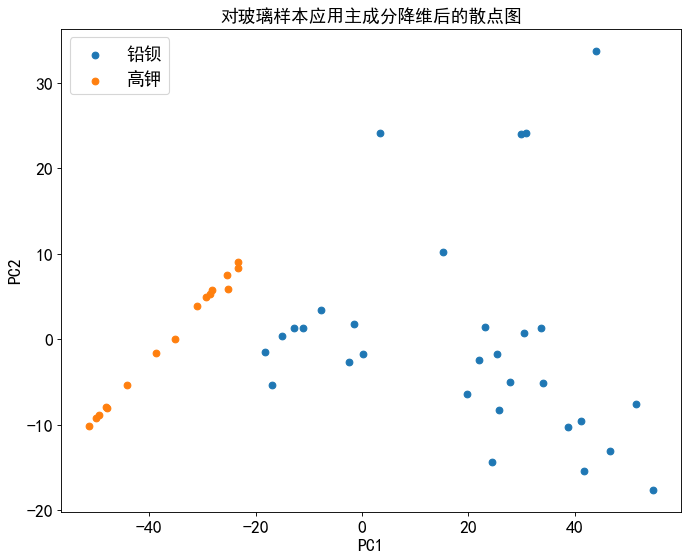

In [43]:
import seaborn as sns

from sklearn.decomposition import PCA
model = PCA(2)
mat = model.fit_transform(Xtrain)

plt.title('对玻璃样本应用主成分降维后的散点图')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(mat[Ytrain==1,0], mat[Ytrain==1,1], label='铅钡')
plt.scatter(mat[Ytrain==0,0], mat[Ytrain==0,1], label='高钾')
plt.legend()
plt.savefig('对玻璃样本应用主成分降维后的散点图.svg')